<table style="width:100%;font-size:11pt">
        <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%"><center>Asignatura</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Datos del alumno</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:10%"><center>Fecha</center>
            </td>
        </tr>
        <tr style="width:100%;font-size:11pt">
            <td rowspan="2" style="border: 1px #0098cd solid"><center><b>Técnicas Multivaraintes y Machine Learning</b></center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left">Apellidos: Gómez del Hierro</td>
            <td rowspan="2" style="border: 1px #0098cd solid"><center>20/05/2024</center>
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Nombres: Gonzalo Miguel
            </td>
        </tr>
            <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Actividad</center>
            </td>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:left">Laboratorio: Resolver un problema de regresión
            </td>
        </tr>    
</table>

In [37]:
# importamos librerías y funciones para usar durante el desarrollo de la práctica
import sklearn
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
semilla = 72204274

In [ ]:
# definimos una lista con los dígitos de la semilla
digitos = [int(str(semilla)[i]) for i in range(len(str(semilla)))]

In [4]:
# definimos las variables de entrada para crear la colección de datos según se indica
n_samples = 200 + 10 * digitos[0]
n_features = 10 +  digitos[1] + digitos[2]
n_informative = 10 + digitos[1]
noise = 10 * digitos[3]

In [5]:
# generamos la colección de datos
X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                      bias=2, noise=noise, random_state=semilla, shuffle=False)

In [11]:
# Generamos un dataset apropiado con la info que tenemos
# etiquetas para las n_features variables independientes + la variable independiente
columns = ['x{}'.format(i) for i in range(X.shape[1])]
columns.append('y')

In [12]:
# generamos un dataframe apropiado
df = pd.DataFrame(np.hstack((X,y[:, None])), columns=columns)

In [17]:
# describimos nuestro conjunto de datos con algunas funciones útiles
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.269501,0.737129,-2.193118,-0.828355,1.664510,-0.232538,0.115462,0.326860,1.116113,-1.370920,-0.587969,-1.383810,1.712181,0.588354,-37.300196
1,0.542998,-1.417202,1.073034,-1.211550,0.318735,-1.219499,-0.396530,0.443068,0.460090,-0.594186,0.496988,-1.029253,-0.004616,0.903539,-282.957737
2,-0.294853,0.127623,-0.452688,1.118561,0.050531,0.102349,-0.587509,0.547489,-0.635937,-1.580755,-1.315536,-0.104999,0.363390,-0.556688,-7.713450
3,0.391708,-0.415140,-2.597585,0.732441,-1.852108,-0.979597,-0.708763,0.237101,-1.529880,-0.044240,-2.525413,0.492066,-0.531096,-0.510532,-491.368863
4,-1.363567,-1.251757,0.980020,0.585812,-1.146512,1.922268,0.413203,0.199472,-1.499490,-1.190639,0.383157,-2.985683,0.294523,0.133573,-339.043700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.711460,0.348867,-1.313028,1.427176,-2.026457,-0.118991,-1.183111,0.458023,-0.646270,0.187063,-0.927669,0.664616,-0.488906,-0.889569,-102.795222
266,-0.633274,0.763197,1.050081,0.479384,-1.544629,-0.276024,0.837540,-0.358189,-0.744898,0.160718,0.082146,-0.510537,-1.084214,0.674409,-115.512567
267,0.479656,1.521741,0.773518,-1.748895,-0.088236,0.759026,0.484181,-1.389333,-1.004992,-0.789240,-0.583054,0.057783,0.577988,0.390474,-107.295421
268,-0.665360,0.611959,1.685426,-0.954907,-0.542424,0.706497,2.128498,-0.642810,1.456628,0.714836,-1.747764,-1.985561,1.610125,2.078246,-141.243490


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      270 non-null    float64
 1   x1      270 non-null    float64
 2   x2      270 non-null    float64
 3   x3      270 non-null    float64
 4   x4      270 non-null    float64
 5   x5      270 non-null    float64
 6   x6      270 non-null    float64
 7   x7      270 non-null    float64
 8   x8      270 non-null    float64
 9   x9      270 non-null    float64
 10  x10     270 non-null    float64
 11  x11     270 non-null    float64
 12  x12     270 non-null    float64
 13  x13     270 non-null    float64
 14  y       270 non-null    float64
dtypes: float64(15)
memory usage: 31.8 KB


In [14]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,-0.060064,0.070989,0.097639,0.021075,0.044074,-0.034278,-0.004859,-0.073047,-0.038087,-0.017383,0.012835,-0.093100,-0.016535,-0.050445,-1.166780
std,1.028713,1.005115,1.021846,1.008183,1.066150,1.005721,1.011420,0.925800,0.992142,0.994974,1.006203,0.971239,0.983325,1.002806,229.540247
min,-3.120856,-3.156815,-2.970350,-3.257398,-2.585811,-2.479380,-2.691253,-2.804746,-2.851281,-2.931283,-2.842583,-2.985683,-2.352346,-3.129854,-583.240576
25%,-0.733104,-0.509566,-0.549374,-0.662216,-0.650392,-0.703428,-0.671196,-0.660350,-0.673874,-0.759283,-0.606439,-0.755379,-0.715475,-0.740220,-166.756265
50%,0.055380,0.162021,0.046068,0.007064,-0.011235,-0.036840,0.011921,-0.118581,-0.029542,-0.034009,0.024741,-0.103939,-0.007842,-0.060796,-4.801024
75%,0.592825,0.756689,0.759846,0.774794,0.770719,0.645437,0.622739,0.521601,0.643980,0.646684,0.608190,0.546847,0.617982,0.605687,148.554405
max,2.859503,2.326593,2.816650,2.453747,3.190289,2.866605,2.664471,2.650670,2.911884,2.921315,2.911150,2.899479,2.379175,2.572925,670.475317


In [15]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.269501,0.737129,-2.193118,-0.828355,1.664510,-0.232538,0.115462,0.326860,1.116113,-1.370920,-0.587969,-1.383810,1.712181,0.588354,-37.300196
1,0.542998,-1.417202,1.073034,-1.211550,0.318735,-1.219499,-0.396530,0.443068,0.460090,-0.594186,0.496988,-1.029253,-0.004616,0.903539,-282.957737
2,-0.294853,0.127623,-0.452688,1.118561,0.050531,0.102349,-0.587509,0.547489,-0.635937,-1.580755,-1.315536,-0.104999,0.363390,-0.556688,-7.713450
3,0.391708,-0.415140,-2.597585,0.732441,-1.852108,-0.979597,-0.708763,0.237101,-1.529880,-0.044240,-2.525413,0.492066,-0.531096,-0.510532,-491.368863
4,-1.363567,-1.251757,0.980020,0.585812,-1.146512,1.922268,0.413203,0.199472,-1.499490,-1.190639,0.383157,-2.985683,0.294523,0.133573,-339.043700


In [16]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
265,0.711460,0.348867,-1.313028,1.427176,-2.026457,-0.118991,-1.183111,0.458023,-0.646270,0.187063,-0.927669,0.664616,-0.488906,-0.889569,-102.795222
266,-0.633274,0.763197,1.050081,0.479384,-1.544629,-0.276024,0.837540,-0.358189,-0.744898,0.160718,0.082146,-0.510537,-1.084214,0.674409,-115.512567
267,0.479656,1.521741,0.773518,-1.748895,-0.088236,0.759026,0.484181,-1.389333,-1.004992,-0.789240,-0.583054,0.057783,0.577988,0.390474,-107.295421
268,-0.665360,0.611959,1.685426,-0.954907,-0.542424,0.706497,2.128498,-0.642810,1.456628,0.714836,-1.747764,-1.985561,1.610125,2.078246,-141.243490
269,0.913633,0.476422,-0.832167,-0.546949,0.668367,-0.932983,-0.265288,-1.080782,1.767003,1.716341,0.248506,0.591430,0.400318,2.430899,76.884568


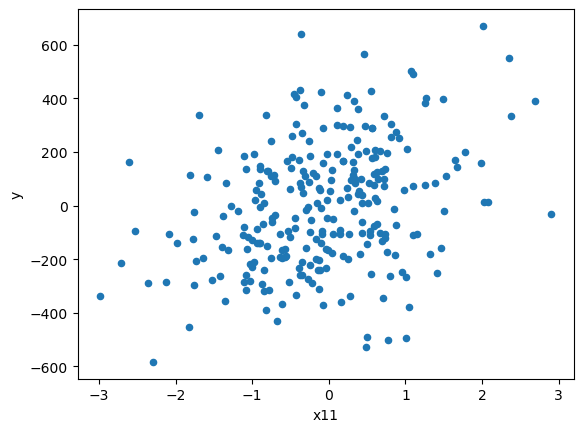

In [34]:
ax1 = df.plot.scatter(x='x11', y='y')

<Axes: >

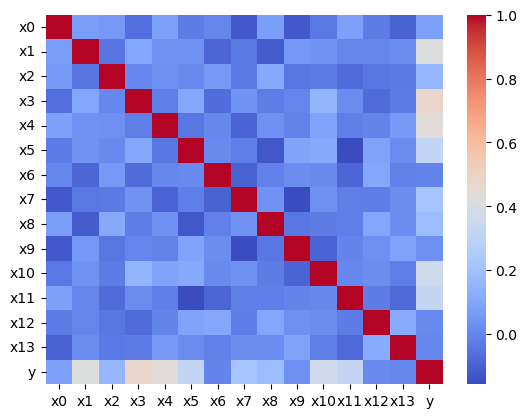

In [39]:
corr = df.corr(method='pearson')
sns.heatmap(corr, cmap='coolwarm')